In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, roc_curve
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
fontdict1 = {"fontsize": 12}
fontdict2 = {"fontsize": 10}

### Первичный анализ данных

In [3]:
df = pd.read_csv("new_train.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [5]:
df.dropna(inplace=True)

In [6]:
num_features = df.dtypes[df.dtypes != "object"].index # числовые признаки
num_features

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

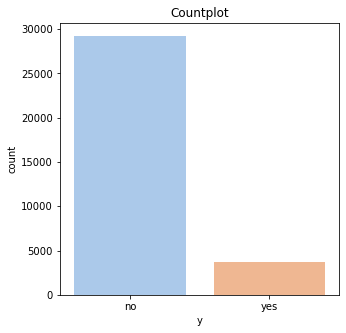

In [7]:
plt.figure(figsize=(5, 5))
plt.xlabel("target", fontdict=fontdict2)
plt.ylabel("count", fontdict=fontdict2)
plt.title("Countplot", fontdict=fontdict1)
sns.countplot(x=df["y"], palette="pastel");

Из диаграммы видна дисбалансировка классов.

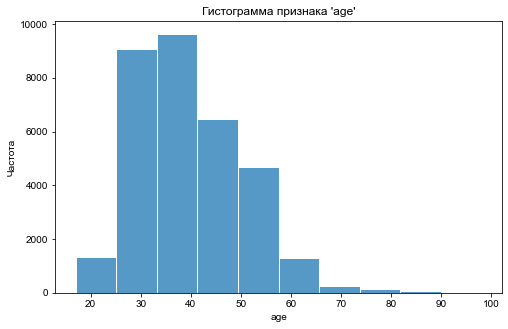

In [8]:
plt.figure(figsize=(8, 5))
plt.xlabel("age", fontdict=fontdict2)
plt.ylabel("Частота", fontdict=fontdict2)
plt.title("Гистограмма признака 'age'", fontdict=fontdict1)
sns.set_style("whitegrid")
sns.histplot(x=df[num_features[0]], bins=10);

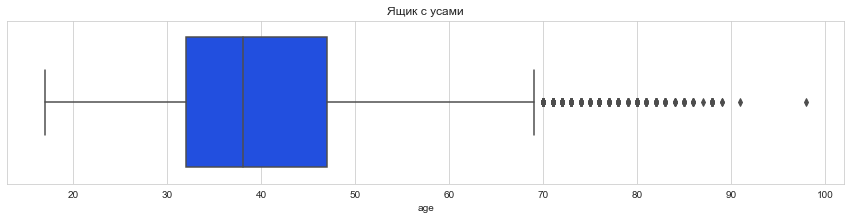

In [9]:
plt.figure(figsize=(15, 3))
plt.title("Ящик с усами", fontdict=fontdict1)
sns.set_style("white")
sns.boxplot(x=df[num_features[0]], palette="bright");

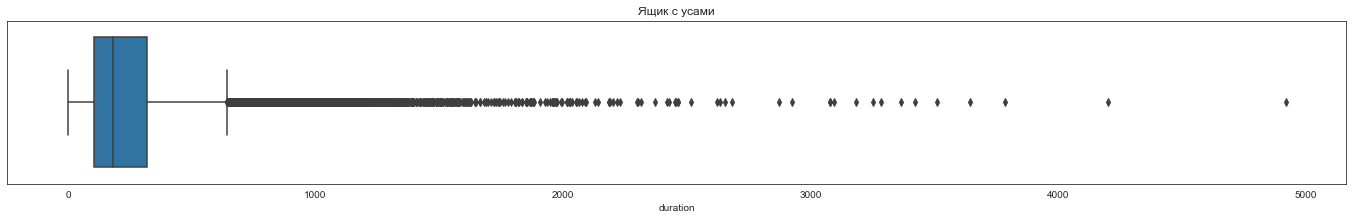

In [10]:
plt.figure(figsize=(24, 3))
plt.title("Ящик с усами", fontdict=fontdict1)
sns.boxplot(x=df[num_features[1]]);

Так как признак "duration" содержит слишком большие значения, то удобнее будет представить прологарифмированные значения на гистограмме:

c:\Users\Den\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


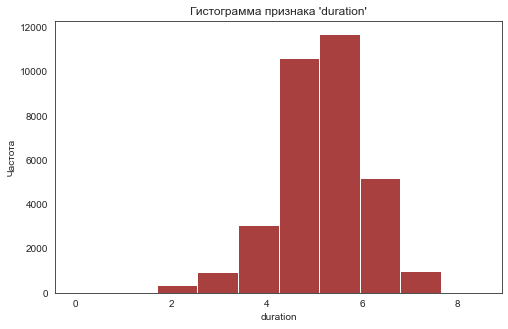

In [11]:
plt.figure(figsize=(8, 5))
plt.xlabel("duration", fontdict=fontdict2)
plt.ylabel("Частота", fontdict=fontdict2)
plt.title("Гистограмма признака 'duration'", fontdict=fontdict1)
sns.set_style("whitegrid")
sns.histplot(x=np.log(df[num_features[1]]), bins=10, color="darkred");

c:\Users\Den\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


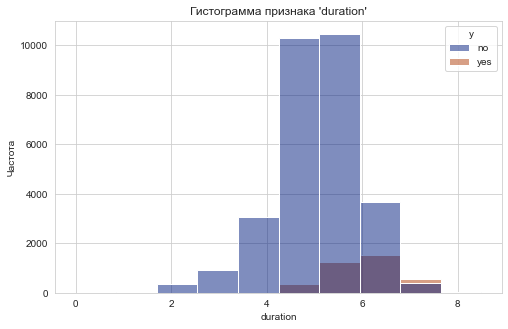

In [12]:
plt.figure(figsize=(8, 5))
plt.xlabel("duration", fontdict=fontdict2)
plt.ylabel("Частота", fontdict=fontdict2)
plt.title("Гистограмма признака 'duration'", fontdict=fontdict1)
sns.set_style("whitegrid")
sns.histplot(x=np.log(df[num_features[1]]), bins=10, hue=df["y"], palette="dark");

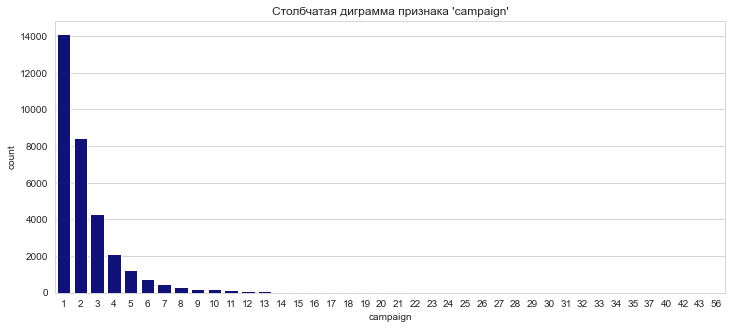

In [13]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'campaign'")
sns.countplot(x=df[num_features[2]], color="darkblue");

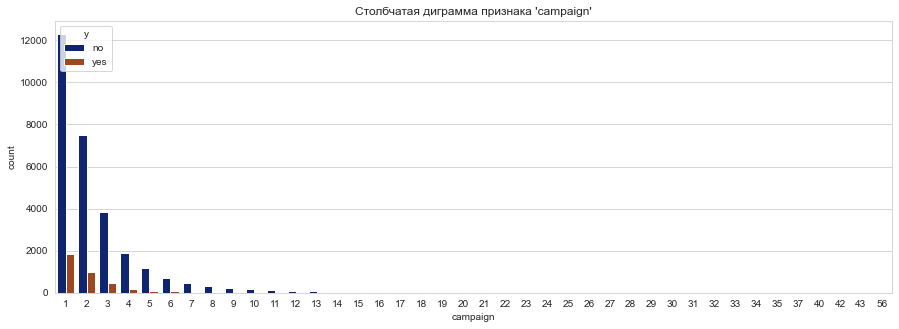

In [14]:
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'campaign'")
sns.countplot(x=df[num_features[2]], hue=df["y"], palette="dark");

In [15]:
df[df["pdays"] != 999]["pdays"]

19        3
24        6
88        3
127      10
146       8
         ..
32732     9
32786     3
32844     4
32863     0
32941     2
Name: pdays, Length: 1226, dtype: int64

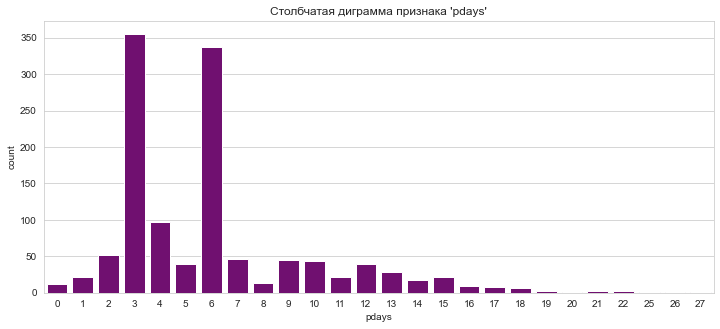

In [16]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'pdays'")
sns.countplot(x=df[df["pdays"] != 999]["pdays"], color="purple");

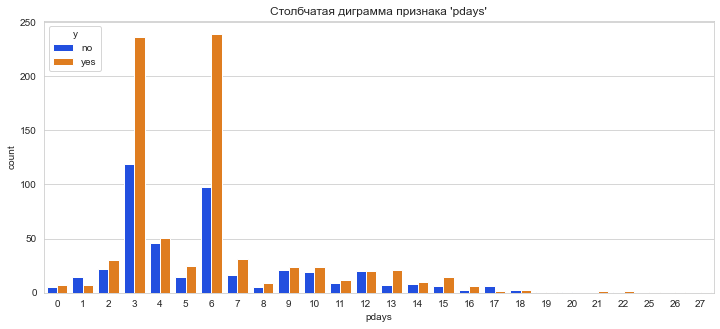

In [17]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'pdays'")
sns.countplot(x=df[df["pdays"] != 999]["pdays"], hue=df["y"], palette="bright");

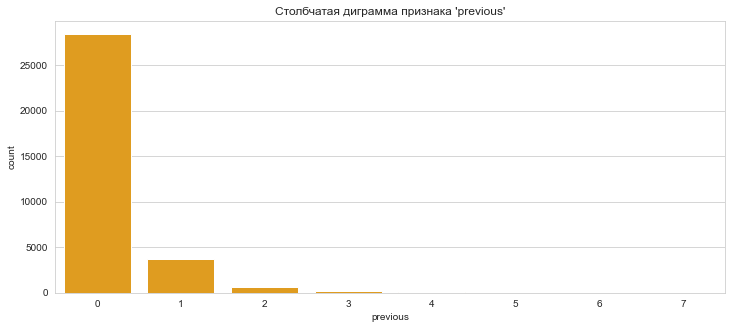

In [18]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'previous'")
sns.countplot(x=df["previous"], color="orange");

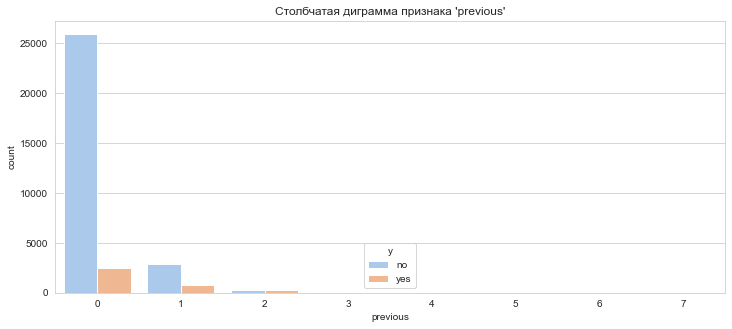

In [19]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'previous'")
sns.countplot(x=df["previous"], hue=df["y"], palette="pastel");

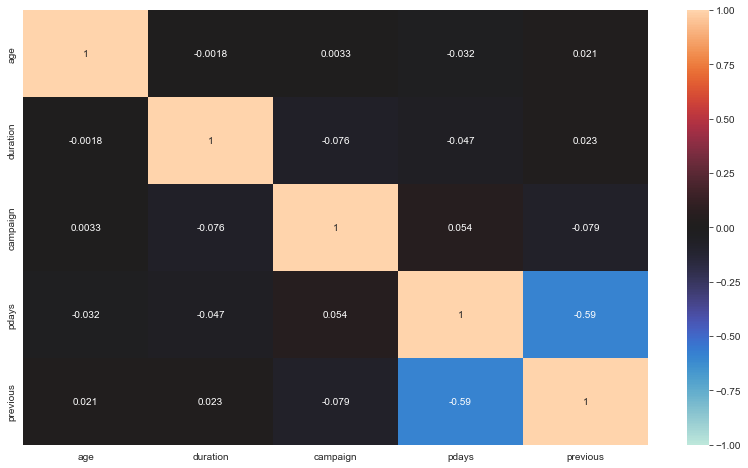

In [20]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0);

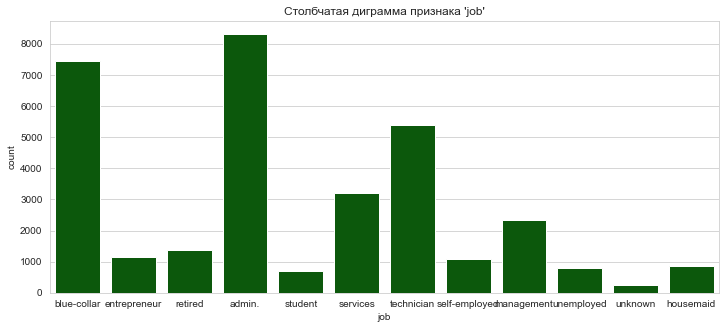

In [21]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'job'")
sns.countplot(x=df["job"], color="darkgreen");

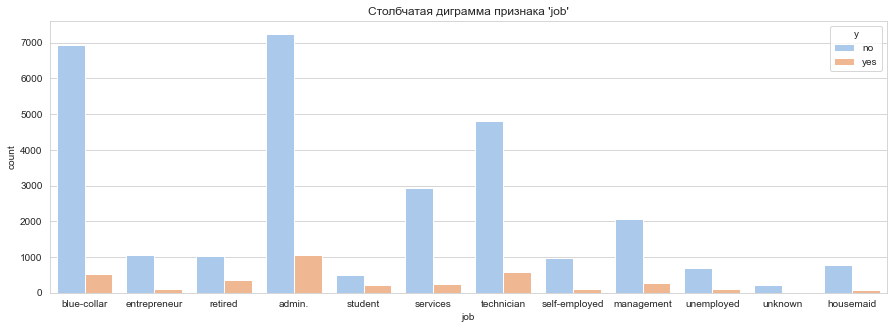

In [22]:
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'job'")
sns.countplot(x=df["job"], hue=df["y"], palette="pastel");

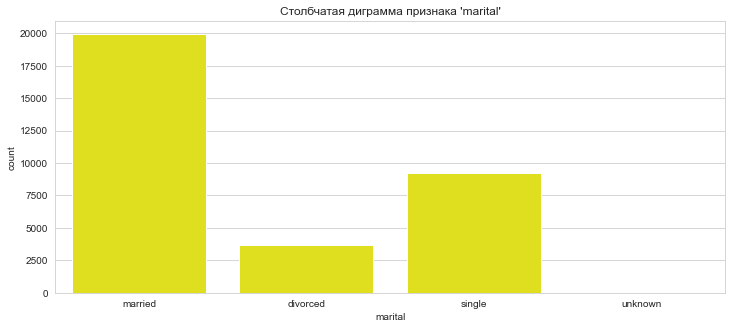

In [23]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'marital'")
sns.countplot(x=df["marital"], color="yellow");

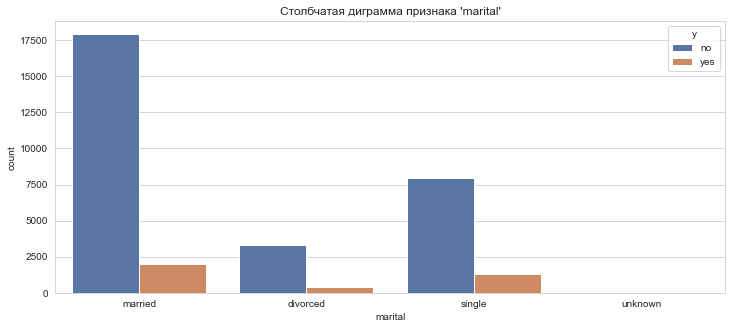

In [24]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'marital'")
sns.countplot(x=df["marital"], hue=df["y"], palette="deep");

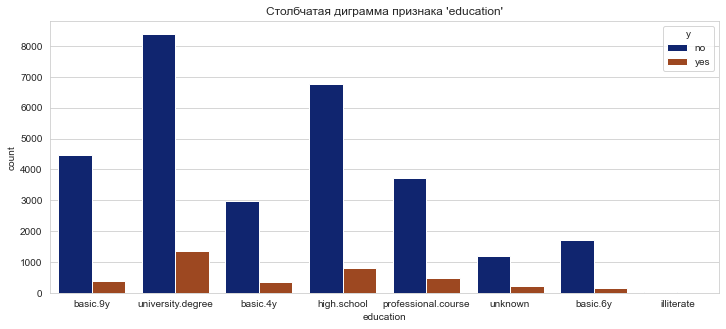

In [25]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'education'")
sns.countplot(x=df["education"], hue=df["y"], palette="dark");

In [26]:
df.dtypes[df.dtypes == "object"].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

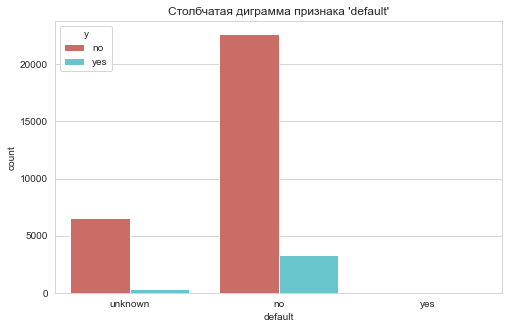

In [27]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'default'")
sns.countplot(x=df["default"], hue=df["y"], palette="hls");

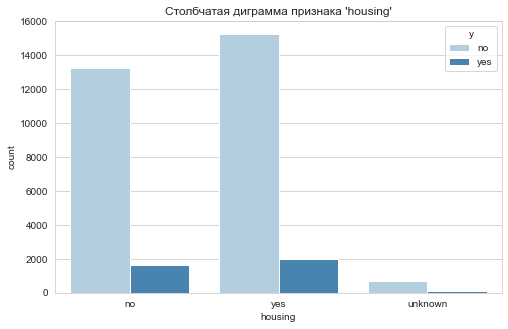

In [28]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'housing'")
sns.countplot(x=df["housing"], hue=df["y"], palette="Blues");

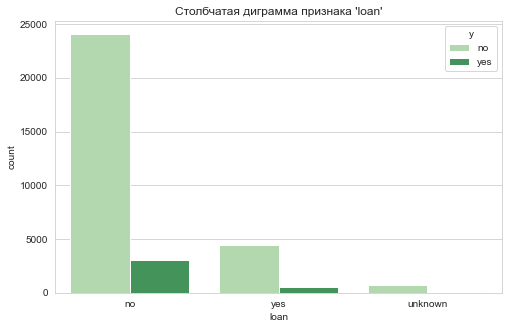

In [29]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'loan'")
sns.countplot(x=df["loan"], hue=df["y"], palette="Greens");

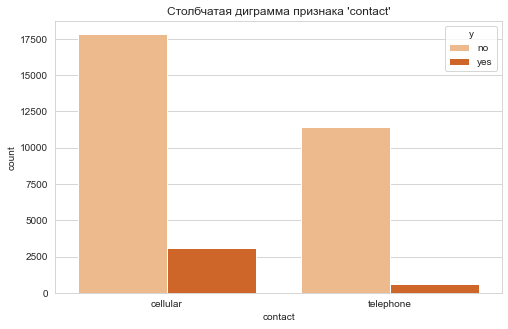

In [30]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'contact'")
sns.countplot(x=df["contact"], hue=df["y"], palette="Oranges");

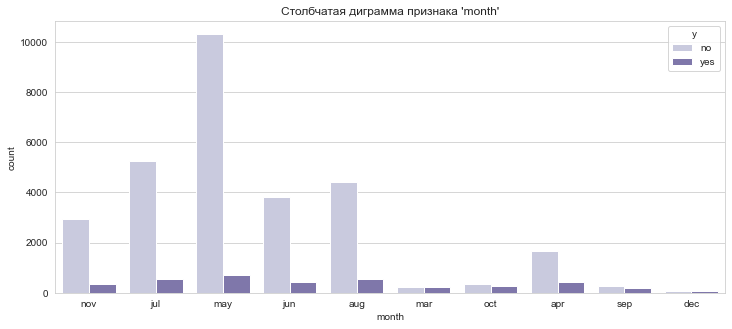

In [31]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'month'")
sns.countplot(x=df["month"], hue=df["y"], palette="Purples");

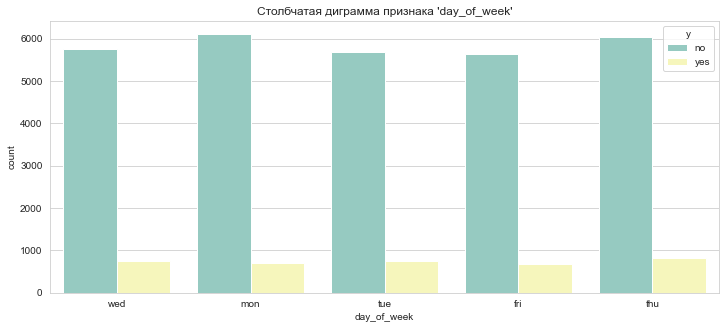

In [32]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'day_of_week'")
sns.countplot(x=df["day_of_week"], hue=df["y"], palette="Set3");

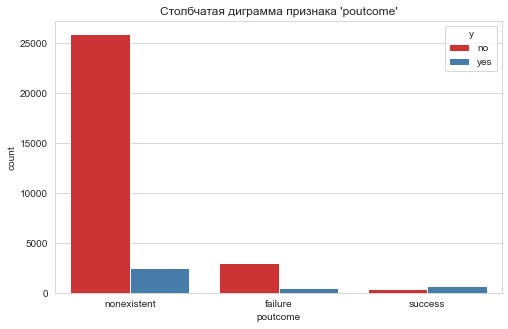

In [33]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
plt.title("Столбчатая диграмма признака 'poutcome'")
sns.countplot(x=df["poutcome"], hue=df["y"], palette="Set1");

### Подготовка данных к обучению модели

In [34]:
df.pdays = pd.Categorical(df.pdays)

In [35]:
df["y"] = (df.y == "yes").astype("int")

In [36]:
df = pd.get_dummies(df)
df.head()

,age,duration,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,pdays_20,pdays_21,pdays_22,pdays_25,pdays_26,pdays_27,pdays_999,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,227,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,37,202,2,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,78,1148,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,36,120,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,59,368,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [37]:
num_features = num_features.delete(num_features.get_loc("pdays"))
scaler = StandardScaler()
scaler.fit(df[num_features])
scaled_values = scaler.transform(df[num_features])

In [38]:
scaled_sub_df = pd.DataFrame(scaled_values, columns=num_features)
scaled_sub_df

,age,duration,campaign,previous
0,0.863739,-0.120196,0.522981,-0.350127
1,-0.289722,-0.216732,-0.203688,1.653813
2,3.651268,3.436173,-0.567023,-0.350127
3,-0.385843,-0.533368,-0.203688,-0.350127
4,1.824956,0.424264,-0.203688,-0.350127
...,...,...,...,...
32945,-1.154817,-0.255346,-0.567023,-0.350127
32946,1.152104,-0.749608,-0.567023,1.653813
32947,1.344347,-0.490893,0.522981,-0.350127
32948,-1.058695,-0.359604,-0.567023,-0.350127


In [39]:
num_features

Index(['age', 'duration', 'campaign', 'previous'], dtype='object')

In [40]:
data = df.drop(num_features, axis =1) 
df = pd.concat([scaled_sub_df, data], axis=1, join='inner')
df

,age,duration,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,pdays_20,pdays_21,pdays_22,pdays_25,pdays_26,pdays_27,pdays_999,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.863739,-0.120196,0.522981,-0.350127,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,-0.289722,-0.216732,-0.203688,1.653813,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,3.651268,3.436173,-0.567023,-0.350127,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,-0.385843,-0.533368,-0.203688,-0.350127,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1.824956,0.424264,-0.203688,-0.350127,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,-1.154817,-0.255346,-0.567023,-0.350127,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
32946,1.152104,-0.749608,-0.567023,1.653813,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
32947,1.344347,-0.490893,0.522981,-0.350127,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
32948,-1.058695,-0.359604,-0.567023,-0.350127,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [41]:
target = df["y"]
df.drop(columns=["y"], inplace=True)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,target,test_size = 0.3,random_state=10)

In [43]:
df.dtypes[df.dtypes != "float64"].index

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'pdays_0', 'pdays_1

In [44]:
df[df.dtypes[df.dtypes != "float64"].index] = df[df.dtypes[df.dtypes != "float64"].index].astype("int64")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            32950 non-null  float64
 1   duration                       32950 non-null  float64
 2   campaign                       32950 non-null  float64
 3   previous                       32950 non-null  float64
 4   job_admin.                     32950 non-null  int64  
 5   job_blue-collar                32950 non-null  int64  
 6   job_entrepreneur               32950 non-null  int64  
 7   job_housemaid                  32950 non-null  int64  
 8   job_management                 32950 non-null  int64  
 9   job_retired                    32950 non-null  int64  
 10  job_self-employed              32950 non-null  int64  
 11  job_services                   32950 non-null  int64  
 12  job_student                    32950 non-null 

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
sm = SMOTE(random_state=27)
# applying it to the training set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

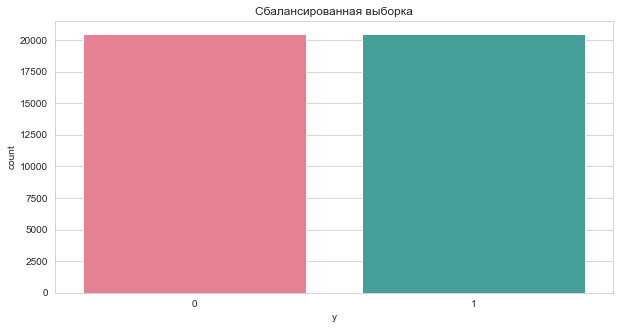

In [48]:
plt.figure(figsize=(10, 5))
plt.title("Сбалансированная выборка")
sns.countplot(x =y_train_smote, palette="husl");

### Обучение модели

#### 1) Случайный лес

In [49]:
clf = RandomForestClassifier()

In [50]:
parameters = {"max_depth":[1, 10]}
grid = GridSearchCV(clf, parameters)
grid.fit(X_train_smote, y_train_smote)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 10]})

In [51]:
grid.best_params_

{'max_depth': 10}

In [52]:
clf = RandomForestClassifier(max_depth=10)
clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=10)

In [53]:
pred = clf.predict(X_test)

In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      8762
           1       0.44      0.76      0.56      1123

    accuracy                           0.86      9885
   macro avg       0.71      0.82      0.74      9885
weighted avg       0.91      0.86      0.88      9885



#### 2) Метод опорных векторов

In [55]:
svm_clf = LinearSVC()
params = {"C": [1, 5]}
grid_for_svm = GridSearchCV(svm_clf, params)
grid_for_svm.fit(X_train_smote, y_train_smote)

c:\Users\Den\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Den\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Den\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Den\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Den\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Den\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [1, 5]})

In [56]:
grid_for_svm.best_params_["C"]

5

In [57]:
svm_clf = LinearSVC(C=grid_for_svm.best_params_["C"])
svm_clf.fit(X_train_smote, y_train_smote)

c:\Users\Den\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=5)

In [58]:
pred2 = svm_clf.predict(X_test)

In [59]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8762
           1       0.62      0.36      0.45      1123

    accuracy                           0.90      9885
   macro avg       0.77      0.66      0.70      9885
weighted avg       0.89      0.90      0.89      9885



#### 3) Логистическая регрессия

In [60]:
log_clf = LogisticRegression()
params = {"C": [1, 5]}
grid_for_log = GridSearchCV(log_clf, params)
grid_for_log.fit(X_train_smote, y_train_smote)

c:\Users\Den\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Den\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

GridSearchCV(estimator=LogisticRegression(), param_grid={'C': [1, 5]})

In [61]:
grid_for_log.best_params_["C"]

1

In [62]:
log_clf = LogisticRegression(C=grid_for_log.best_params_["C"])
log_clf.fit(X_train_smote, y_train_smote)

c:\Users\Den\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [63]:
pred3 = log_clf.predict(X_test)

In [64]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      8762
           1       0.61      0.44      0.51      1123

    accuracy                           0.90      9885
   macro avg       0.77      0.70      0.73      9885
weighted avg       0.89      0.90      0.90      9885



c:\Users\Den\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Den\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Den\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 

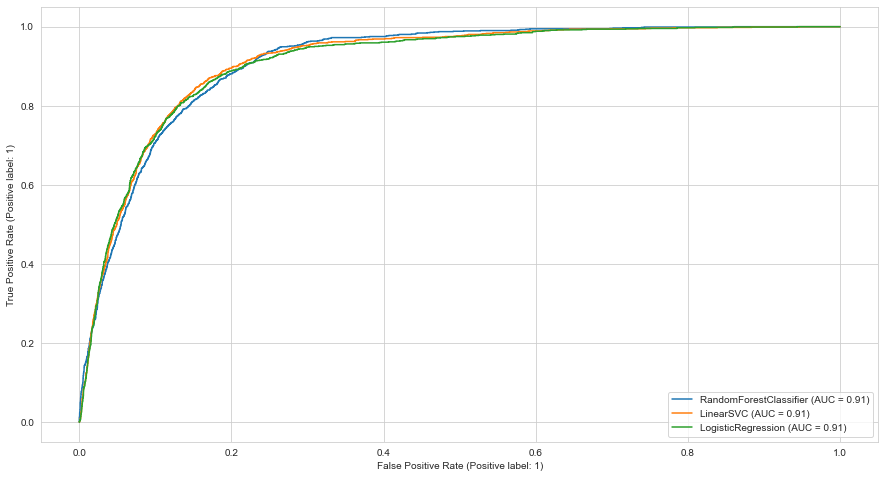

In [65]:
classifiers = [clf, svm_clf, log_clf]
plt.figure(figsize=(15, 8))
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=plt.gca())